# Machine learning to predict new crescent moon visibility

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# MACHINE LEARNING IMPORTS
#import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
data_file = '..\\Data\\icouk_sighting_data_with_params.csv'
data = pd.read_csv(data_file)
"""
data = data.drop('Index', axis = 1)
data = data.drop('W', axis = 1)
data = data.drop('W\'', axis = 1)
data = data.drop('q', axis = 1)
data = data.drop('q\'', axis = 1)
data = data.drop('Lag', axis = 1)
"""
data = data[["Latitude", "Longitude", "Seen"]]
rand = np.random()
data.insert(2,np.random.rand(1,data.shape[0]),"Random")
data.head(10)

,Latitude,Longitude,Seen
0,53.95763,-1.08271,Not_seen
1,53.95763,-1.08271,Not_seen
2,53.95763,-1.08271,Not_seen
3,53.58333,-2.43333,Not_seen
4,52.63860,-1.13169,Seen
5,52.63860,-1.13169,Not_seen
6,51.87967,-0.41748,Not_seen
7,51.39822,-0.19837,Not_seen
8,53.95763,-1.08271,Not_seen
9,53.58333,-2.43333,Not_seen


In [15]:
# Visualising a couple of variables.
variable_list =  data.columns.tolist() #['Hijri year', 'Month', 'Seen?','Lat','Lon']
 #print(variable_list)

# List of label options
ptype = [r"Seen", r"Not_seen"]

# Plot data
#diag_kind='kde'
showpairplot = False
if showpairplot == True:
   fig = sns.pairplot(data[variable_list], hue = 'Seen', palette = 'bright')

   # Change location of legend
   fig._legend.set_bbox_to_anchor((1.05, 0.5))

   # Add legend
   for t, l in zip(fig._legend.texts, ptype):
      t.set_text(str(t.get_text()) + " - " + str(l))


   plt.show()


In [16]:
# List of features without label feature
features = variable_list
features.remove('Seen')
#print(features)

X = data[features]
y = np.array(data['Seen'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80/20 training/test split

In [17]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
# gini or entropy
rf = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth=12,random_state=1, oob_score=True)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, oob_score=True, random_state=1)

In [18]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 0.9096153846153846
Accuracy on testing dataset: 0.9389312977099237


In [19]:
print('Oob Score: ', rf.score(x_test, y_test))

Oob Score:  0.9389312977099237


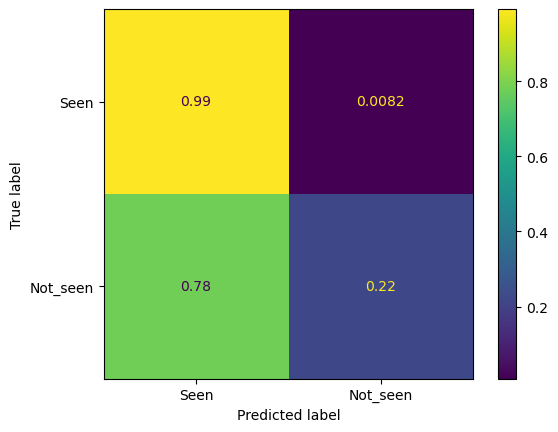

In [20]:
# plot your confusion matrix
cm = confusion_matrix(y_test, y_pred ,normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype)
disp.plot()
plt.show()

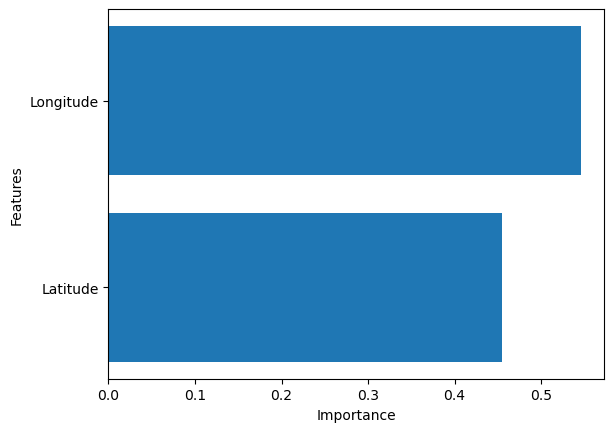

In [21]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(len(features)), importance)
plt.yticks(range(len(features)), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Hyperparameter adjustment - not of much note 

In [13]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
# Produce predictions for the classification of your training dataset using your model:
y_pred_best = rf_best.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred_best))
rf_best_acc_train = metrics.accuracy_score(y_train, y_pred_best)
y_pred_best = rf_best.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred_best))
rf_best_acc_train = metrics.accuracy_score(y_test, y_pred_best)